In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Importamos nuestro archivo de ánalisis.

nba=pd.read_csv("./output/basket_analysis.csv")

In [3]:
nba2019=nba[nba["Season"]=="2018 - 2019"]
nba2019

,League,Season,Stage,Player,Team,GP,MIN,2PM,2PA,3PM,...,1PA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
11,NBA,2018 - 2019,Regular_Season,LeBron James,Lakers,55,1937.4,558,1095,111,...,418,197,94,57,408,465,454,72,33,1505
12,NBA,2018 - 2019,Regular_Season,Kyle Kuzma,Lakers,70,2313.6,496,1087,128,...,250,133,170,60,322,382,178,41,26,1308
13,NBA,2018 - 2019,Regular_Season,Brandon Ingram,Lakers,52,1760.5,362,729,31,...,289,129,149,41,226,267,154,28,31,950
14,NBA,2018 - 2019,Regular_Season,Kentavious Caldwell-Pope,Lakers,82,2035.0,325,756,151,...,158,65,137,48,190,238,110,73,13,938
15,NBA,2018 - 2019,Regular_Season,JaVale McGee,Lakers,75,1670.8,400,641,1,...,152,108,208,195,371,566,52,47,148,897
16,NBA,2018 - 2019,Regular_Season,Reggie Bullock,Lakers,63,1878.9,245,594,148,...,85,65,109,22,151,173,129,40,12,711
17,NBA,2018 - 2019,Regular_Season,Josh Hart,Lakers,67,1714.8,189,464,92,...,80,58,147,35,213,248,93,64,40,525
18,NBA,2018 - 2019,Regular_Season,Lance Stephenson,Lakers,68,1122.7,184,432,73,...,73,86,111,32,183,215,140,41,7,491
19,NBA,2018 - 2019,Regular_Season,Lonzo Ball,Lakers,47,1422.6,185,456,75,...,48,103,114,54,197,251,255,69,19,465
20,NBA,2018 - 2019,Regular_Season,Mike Muscala,Lakers,64,1305.9,145,361,89,...,85,48,130,57,187,244,76,22,38,449


In [4]:
nba2020=nba[nba["Season"]=="2019 - 2020"]

In [48]:
def compare(P1, P2, stats=['GP', 'MIN', '2PM', '2PA', '3PM',
       '3PA', '1PM', '1PA', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL',
       'BLK', 'PTS']):
    
    results={"Game played":(P1[stats[0]], P2[stats[0]]),
            #"Minutes played":(P1[stats[1]], P2[stats[1]]),
            "2 points made":(P1[stats[2]], P2[stats[2]]),
            "2 points attemps":(P1[stats[3]], P2[stats[3]]),
            "3 points made":(P1[stats[4]], P2[stats[4]]),
            "3 points attemps":(P1[stats[5]], P2[stats[5]]),
            "1 points made":(P1[stats[6]], P2[stats[6]]),
            "1 points attemps":(P1[stats[7]], P2[stats[7]]),
            "Turnovers":(P1[stats[8]], P2[stats[8]]),
            "Personal foults":(P1[stats[9]], P2[stats[9]]),
            "Offensive Rebounds":(P1[stats[10]], P2[stats[10]]),
            "Defensive Rebounds":(P1[stats[11]], P2[stats[11]]),
            "Rebounds":(P1[stats[12]], P2[stats[12]]),
            "Assists":(P1[stats[13]], P2[stats[13]]),
            "Steals":(P1[stats[14]], P2[stats[14]]),
            "Block":(P1[stats[15]], P2[stats[15]]),
            "Points":(P1[stats[16]], P2[stats[16]])}
    
    return results 

In [49]:
#Comparamos las estadísticas de 2019.

P1=nba2019[nba2019["Player"]==input("Player 1: ")]
P2=nba2019[nba2019["Player"]==input("Player 2: ")]
a=compare(P1, P2)
a

Player 1: LeBron James
Player 2: LeBron James


{'Game played': (11    55
  Name: GP, dtype: int64,
  11    55
  Name: GP, dtype: int64),
 '2 points made': (11    558
  Name: 2PM, dtype: int64,
  11    558
  Name: 2PM, dtype: int64),
 '2 points attemps': (11    1095
  Name: 2PA, dtype: int64,
  11    1095
  Name: 2PA, dtype: int64),
 '3 points made': (11    111
  Name: 3PM, dtype: int64,
  11    111
  Name: 3PM, dtype: int64),
 '3 points attemps': (11    327
  Name: 3PA, dtype: int64,
  11    327
  Name: 3PA, dtype: int64),
 '1 points made': (11    278
  Name: 1PM, dtype: int64,
  11    278
  Name: 1PM, dtype: int64),
 '1 points attemps': (11    418
  Name: 1PA, dtype: int64,
  11    418
  Name: 1PA, dtype: int64),
 'Turnovers': (11    197
  Name: TOV, dtype: int64,
  11    197
  Name: TOV, dtype: int64),
 'Personal foults': (11    94
  Name: PF, dtype: int64,
  11    94
  Name: PF, dtype: int64),
 'Offensive Rebounds': (11    57
  Name: ORB, dtype: int64,
  11    57
  Name: ORB, dtype: int64),
 'Defensive Rebounds': (11    408
  Na

In [ ]:
names = list(a.keys())
values = list(a.values())
plt.bar(0,values[0],tick_label=names[0])
plt.bar(1,values[1],tick_label=names[1])
plt.bar(2,values[2],tick_label=names[2])
plt.bar(3,values[3],tick_label=names[3])
plt.bar(4,values[4],tick_label=names[4])
plt.bar(5,values[5],tick_label=names[5])
plt.bar(6,values[6],tick_label=names[6])
plt.bar(7,values[7],tick_label=names[7])
plt.bar(8,values[8],tick_label=names[8])
plt.bar(9,values[9],tick_label=names[9])
plt.bar(10,values[10],tick_label=names[10])
plt.bar(11,values[11],tick_label=names[11])
plt.bar(12,values[12],tick_label=names[12])
plt.bar(13,values[13],tick_label=names[13])
plt.bar(14,values[14],tick_label=names[14])
plt.bar(15,values[16],tick_label=names[15])
plt.bar(16,values[16],tick_label=names[16])
plt.xticks(range(0,17),names,rotation=45)
plt.show()

In [8]:
def percentage (P1, stats=['GP', 'MIN','2PM', '2PA', '3PM',
       '3PA', '1PM', '1PA']):
    res={"% acierto en tiros de campo":(P1[stats[2]]/ P1[stats[3]]),
         "% acierto en triples":(P1[stats[4]]/ P1[stats[5]]),
         "% acierto en tiros libres":(P1[stats[6]]/ P1[stats[7]])}

    return res

In [9]:
P1=nba2019[nba2019["Player"]==input("Player 1: ")]
b=percentage(P1)
b

Player 1: LeBron James


{'% acierto en tiros de campo': 11    0.509589
 dtype: float64,
 '% acierto en triples': 11    0.33945
 dtype: float64,
 '% acierto en tiros libres': 11    0.665072
 dtype: float64}

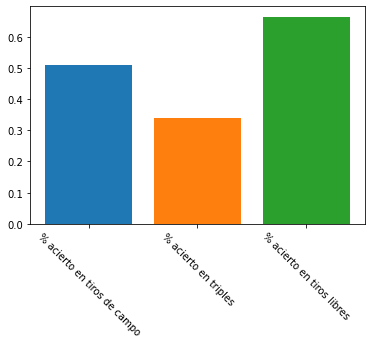

In [52]:
names = list(b.keys())
values = list(b.values())
plt.bar(0,values[0],tick_label=names[0])
plt.bar(1,values[1],tick_label=names[1])
plt.bar(2,values[2],tick_label=names[2])
plt.xticks(range(0,3),names,rotation=-45)
plt.show()

In [133]:
nba2019.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,21.0,66.714286,9.813984,47.00,60.00,67.00,74.00,82.00
MIN,21.0,1770.271429,460.946622,874.90,1422.60,1760.50,2040.20,2547.70
2PM,21.0,311.428571,145.327070,61.00,189.00,293.00,400.00,560.00
2PA,21.0,659.476190,271.734543,99.00,456.00,630.00,870.00,1129.00
3PM,21.0,90.238095,50.115771,0.00,67.00,89.00,112.00,198.00
3PA,21.0,254.285714,130.000055,1.00,187.00,256.00,327.00,453.00
1PM,21.0,129.047619,90.620901,20.00,55.00,97.00,188.00,364.00
1PA,21.0,170.619048,115.741296,44.00,80.00,152.00,250.00,426.00
TOV,21.0,102.904762,44.603705,42.00,65.00,103.00,129.00,197.00
PF,21.0,145.809524,44.168562,87.00,110.00,140.00,170.00,241.00


,PTS
Team,
Lakers,102.59
Toronto Raptors,113.09


<AxesSubplot:ylabel='PTS'>

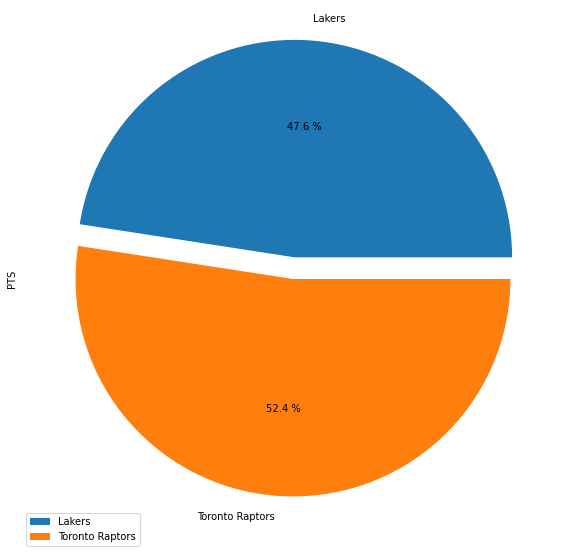

In [11]:
# Vamos a comparar ahora el total de puntos por partido de cada equipo.
# Para ello, vamos a tener en cuenta que en la liga regular se juegan un total de 82 partidos.

total_points=nba2019.groupby(["Team"]).agg({"PTS":"sum"})
total_points["PTS"]=total_points["PTS"].apply(lambda x:round(x/82,2))
total_points.reset_index()
display(total_points)
desfase = (0.1,0)
total_points.plot.pie(y='PTS', autopct="%0.1f %%", explode=desfase, figsize=(10,10))

,perc_accuracy_2
Team,
Lakers,0.469169
Toronto Raptors,0.504915


<AxesSubplot:xlabel='Team'>

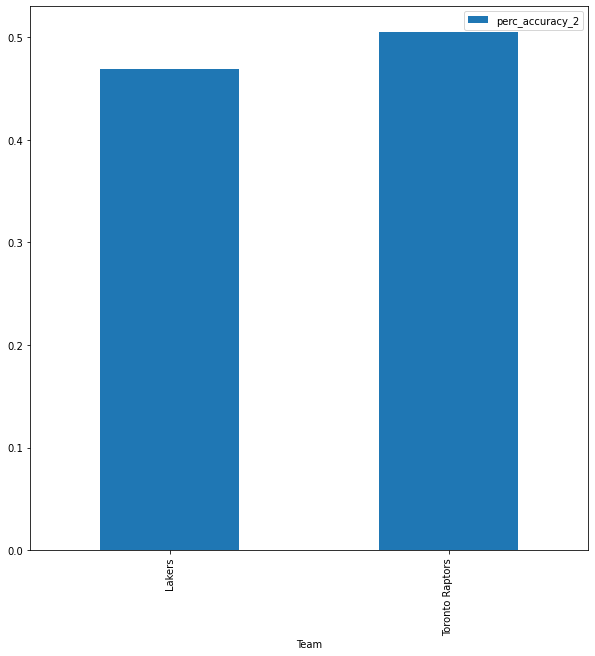

In [12]:
pm2=nba2019.groupby(["Team"]).agg({"2PM":"sum"})
pm2.reset_index()
pa2=nba2019.groupby(["Team"]).agg({"2PA":"sum"})
pa2.reset_index()
pm2["2PM"]=pm2["2PM"].apply(lambda x: x/pa2["2PA"])
pm2.columns=["perc_accuracy_2"]
perc_accuracy_2=pm2
display(perc_accuracy_2)
desfase = (0.1,0)
perc_accuracy_2.plot.bar(figsize=(10,10))

,perc_accuracy_3
Team,
Lakers,0.340659
Toronto Raptors,0.377416


<AxesSubplot:xlabel='Team'>

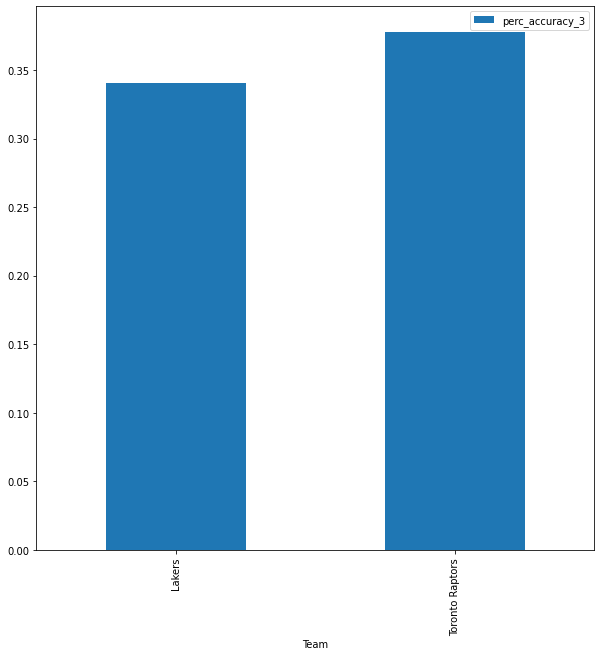

In [13]:
pm3=nba2019.groupby(["Team"]).agg({"3PM":"sum"})
pm3.reset_index()
pa3=nba2019.groupby(["Team"]).agg({"3PA":"sum"})
pa3.reset_index()
pm3["3PM"]=pm3["3PM"].apply(lambda x: x/pa3["3PA"])
pm3.columns=["perc_accuracy_3"]
perc_accuracy_3=pm3
display(perc_accuracy_3)
desfase = (0.1,0)
perc_accuracy_3.plot.bar(figsize=(10,10))

,perc_accuracy_1
Team,
Lakers,0.703188
Toronto Raptors,0.867826


<AxesSubplot:xlabel='Team'>

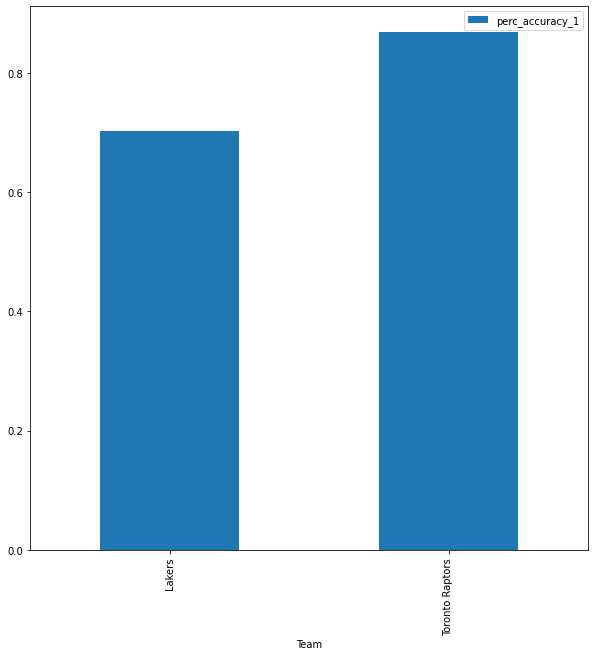

In [14]:
pm1=nba2019.groupby(["Team"]).agg({"1PM":"sum"})
pm1.reset_index()
pa1=nba2019.groupby(["Team"]).agg({"1PA":"sum"})
pa1.reset_index()
pm1["1PM"]=pm1["1PM"].apply(lambda x: x/pa1["1PA"])
pm1.columns=["perc_accuracy_1"]
perc_accuracy_1=pm1
display(perc_accuracy_1)
perc_accuracy_1.plot.bar(figsize=(10,10))

,TOV
Team,
Lakers,1034
Toronto Raptors,1127


<AxesSubplot:ylabel='TOV'>

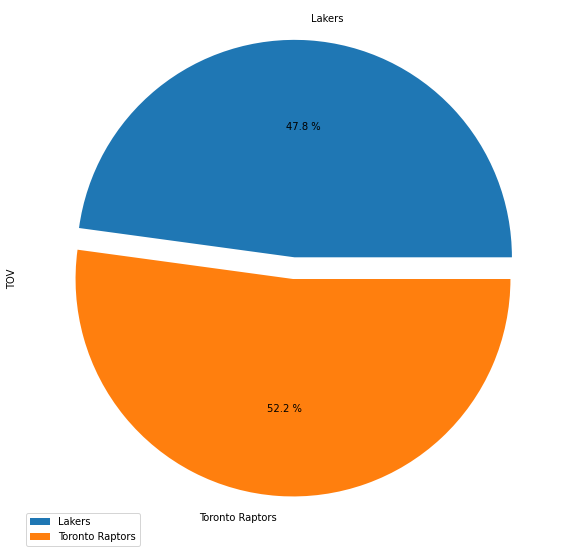

In [15]:
turnovers=nba2019.groupby(["Team"]).agg({"TOV":"sum"})
display(turnovers)
desfase=(0.1,0)
turnovers.plot.pie(y="TOV", autopct="%0.1f %%", explode=desfase, figsize=(10,10))

,ORB
Team,
Lakers,693
Toronto Raptors,656


<AxesSubplot:ylabel='ORB'>

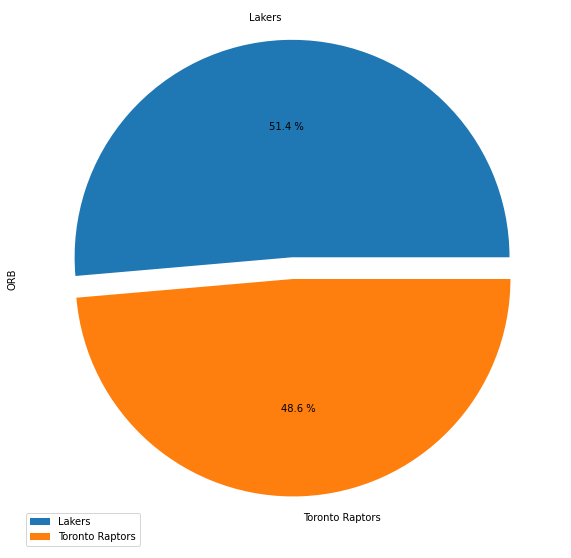

In [16]:
offensive_rebounds=nba2019.groupby(["Team"]).agg({"ORB":"sum"})
display(offensive_rebounds)
desfase=(0.1,0)
offensive_rebounds.plot.pie(y="ORB", autopct="%0.1f %%", explode=desfase, figsize=(10,10))

,DRB
Team,
Lakers,2663
Toronto Raptors,2871


<AxesSubplot:ylabel='DRB'>

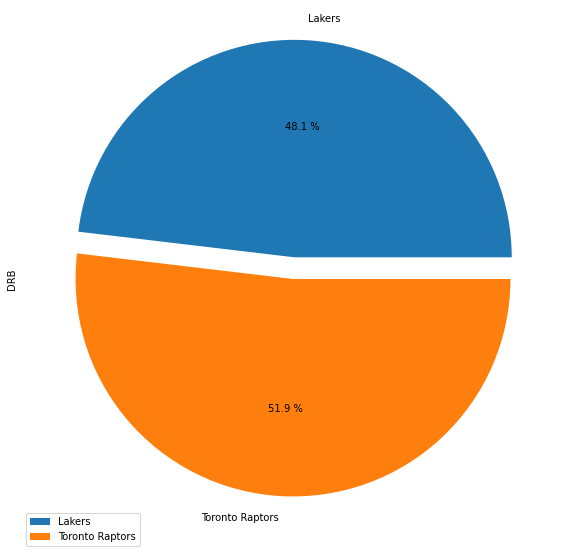

In [17]:
defensive_rebounds=nba2019.groupby(["Team"]).agg({"DRB":"sum"})
display(defensive_rebounds)
desfase=(0.1,0)
defensive_rebounds.plot.pie(y="DRB", autopct="%0.1f %%", explode=desfase, figsize=(10,10))

,AST
Team,
Lakers,1678
Toronto Raptors,2261


<AxesSubplot:ylabel='AST'>

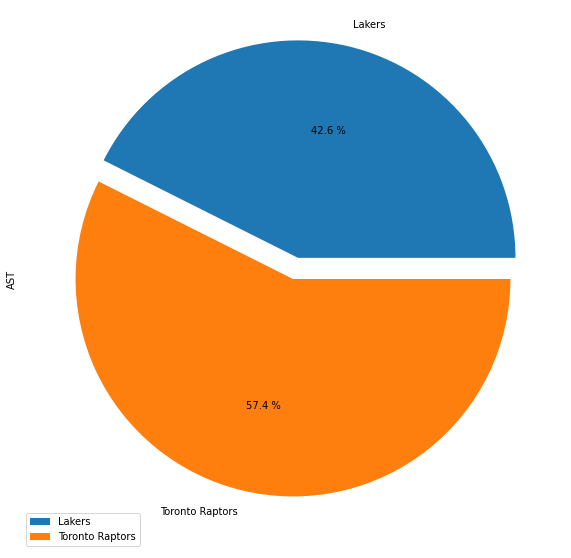

In [18]:
assists=nba2019.groupby(["Team"]).agg({"AST":"sum"})
display(assists)
desfase=(0.1,0)
assists.plot.pie(y="AST", autopct="%0.1f %%", explode=desfase, figsize=(10,10))

,Player,AST,Team
35,Kyle Lowry,564,Toronto Raptors
11,LeBron James,454,Lakers
34,Marc Gasol,349,Toronto Raptors
38,Fred VanVleet,307,Toronto Raptors
19,Lonzo Ball,255,Lakers
32,Pascal Siakam,248,Toronto Raptors
37,Jeremy Lin,231,Toronto Raptors
31,Kawhi Leonard,199,Toronto Raptors
12,Kyle Kuzma,178,Lakers
13,Brandon Ingram,154,Lakers


Text(0, 0.5, 'Nº Assists')

<Figure size 432x288 with 0 Axes>

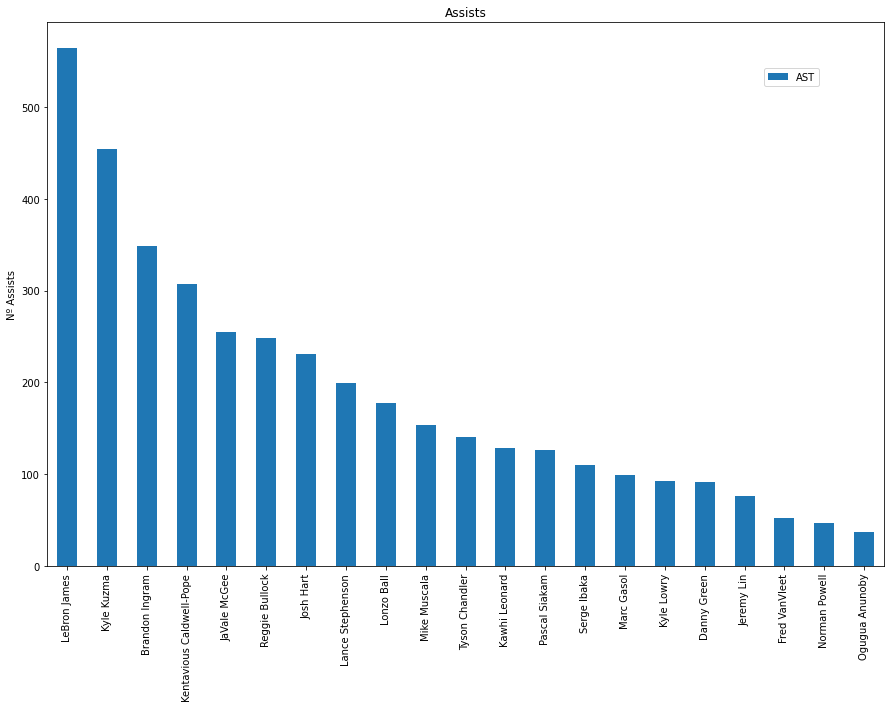

In [19]:
best_assists=nba2019[["Player","AST","Team"]]
best_assists1=best_assists.sort_values(by="AST", ascending=False)
display(best_assists1.head(10))
plt.figure()
ax = best_assists1.plot(kind='bar', figsize=(15,10))
ax.set_xticklabels(best_assists.Player, rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(0.85, 0.9))
plt.title("Assists")
plt.ylabel("Nº Assists")

In [20]:
nba2019["%1PACC"]=round(nba2019["1PM"]/nba2019["1PA"],2)
nba2019["%2PACC"]=round(nba2019["2PM"]/nba2019["2PA"],2)
nba2019["%3PACC"]=round(nba2019["3PM"]/nba2019["3PA"],2)
display(nba2019)

,League,Season,Stage,Player,Team,GP,MIN,2PM,2PA,3PM,...,ORB,DRB,REB,AST,STL,BLK,PTS,%1PACC,%2PACC,%3PACC
11,NBA,2018 - 2019,Regular_Season,LeBron James,Lakers,55,1937.4,558,1095,111,...,57,408,465,454,72,33,1505,0.67,0.51,0.34
12,NBA,2018 - 2019,Regular_Season,Kyle Kuzma,Lakers,70,2313.6,496,1087,128,...,60,322,382,178,41,26,1308,0.75,0.46,0.30
13,NBA,2018 - 2019,Regular_Season,Brandon Ingram,Lakers,52,1760.5,362,729,31,...,41,226,267,154,28,31,950,0.67,0.50,0.33
14,NBA,2018 - 2019,Regular_Season,Kentavious Caldwell-Pope,Lakers,82,2035.0,325,756,151,...,48,190,238,110,73,13,938,0.87,0.43,0.35
15,NBA,2018 - 2019,Regular_Season,JaVale McGee,Lakers,75,1670.8,400,641,1,...,195,371,566,52,47,148,897,0.63,0.62,0.08
16,NBA,2018 - 2019,Regular_Season,Reggie Bullock,Lakers,63,1878.9,245,594,148,...,22,151,173,129,40,12,711,0.86,0.41,0.38
17,NBA,2018 - 2019,Regular_Season,Josh Hart,Lakers,67,1714.8,189,464,92,...,35,213,248,93,64,40,525,0.69,0.41,0.34
18,NBA,2018 - 2019,Regular_Season,Lance Stephenson,Lakers,68,1122.7,184,432,73,...,32,183,215,140,41,7,491,0.68,0.43,0.37
19,NBA,2018 - 2019,Regular_Season,Lonzo Ball,Lakers,47,1422.6,185,456,75,...,54,197,251,255,69,19,465,0.42,0.41,0.33
20,NBA,2018 - 2019,Regular_Season,Mike Muscala,Lakers,64,1305.9,145,361,89,...,57,187,244,76,22,38,449,0.82,0.40,0.35


,Player,%1PACC,Team,MIN
14,Kentavious Caldwell-Pope,0.87,Lakers,2035.0
16,Reggie Bullock,0.86,Lakers,1878.9
31,Kawhi Leonard,0.85,Toronto Raptors,2040.2
37,Jeremy Lin,0.84,Toronto Raptors,1436.3
36,Danny Green,0.84,Toronto Raptors,2215.5
38,Fred VanVleet,0.84,Toronto Raptors,1760.2
39,Norman Powell,0.83,Toronto Raptors,1126.4
35,Kyle Lowry,0.83,Toronto Raptors,2213.4
20,Mike Muscala,0.82,Lakers,1305.9
32,Pascal Siakam,0.78,Toronto Raptors,2547.7


Text(0, 0.5, 'Free Throws Accuracy')

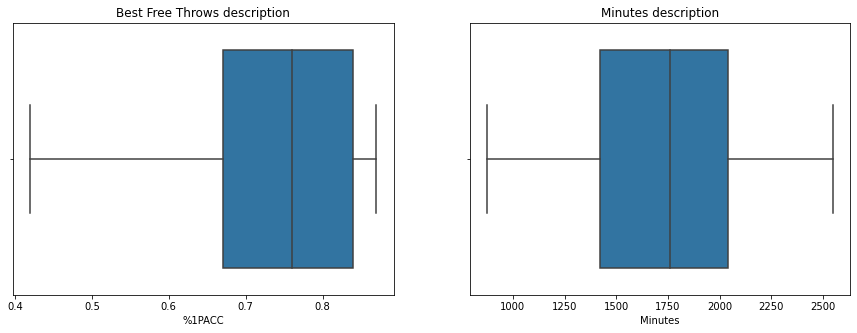

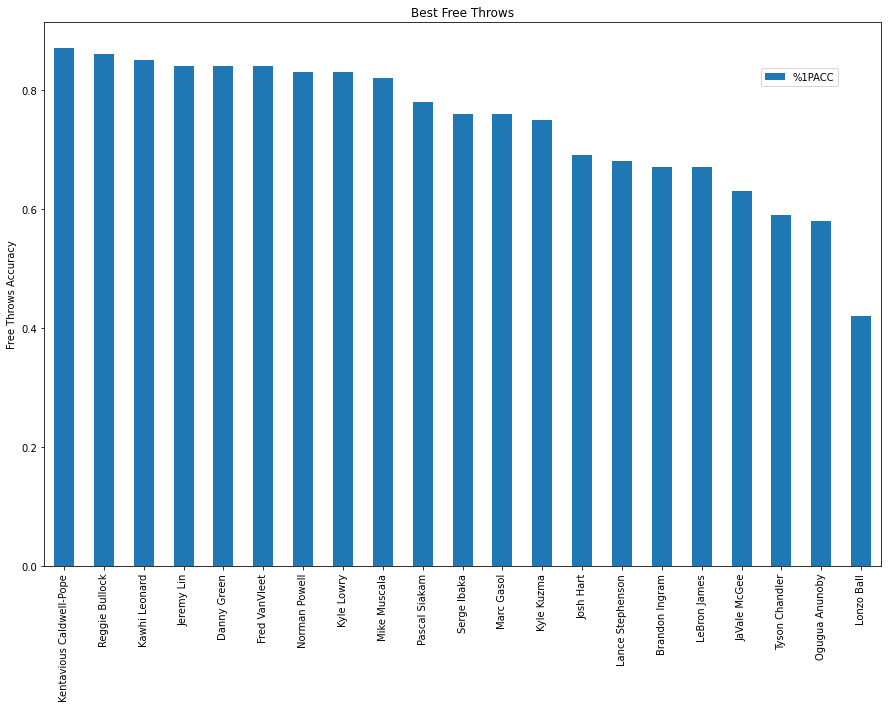

In [131]:
best_free_throws_player=nba2019[["Player","%1PACC","Team","MIN"]]
best_free_throws_player1=best_free_throws_player.sort_values(by="%1PACC", ascending=False)
display(best_free_throws_player1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
box_1PACC=sns.boxplot([nba2019["%1PACC"]])
plt.title("Best Free Throws description")
plt.xlabel("%1PACC")
plt.subplot(1,2,2)
box_mins=sns.boxplot([nba2019["MIN"]])
plt.title("Minutes description")
plt.xlabel("Minutes")
plt.figure()
ax = best_free_throws_player1["%1PACC"].plot(kind='bar', figsize=(15,10))
ax.set_xticklabels(best_free_throws_player1.Player, rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(0.85, 0.9))
plt.title("Best Free Throws")
plt.ylabel("Free Throws Accuracy")


,Player,%2PACC,Team,MIN
21,Tyson Chandler,0.62,Lakers,874.9
15,JaVale McGee,0.62,Lakers,1670.8
32,Pascal Siakam,0.55,Toronto Raptors,2547.7
33,Serge Ibaka,0.53,Toronto Raptors,2010.5
11,LeBron James,0.51,Lakers,1937.4
31,Kawhi Leonard,0.50,Toronto Raptors,2040.2
13,Brandon Ingram,0.50,Lakers,1760.5
39,Norman Powell,0.48,Toronto Raptors,1126.4
36,Danny Green,0.47,Toronto Raptors,2215.5
12,Kyle Kuzma,0.46,Lakers,2313.6


Text(0, 0.5, '2P Accuracy')

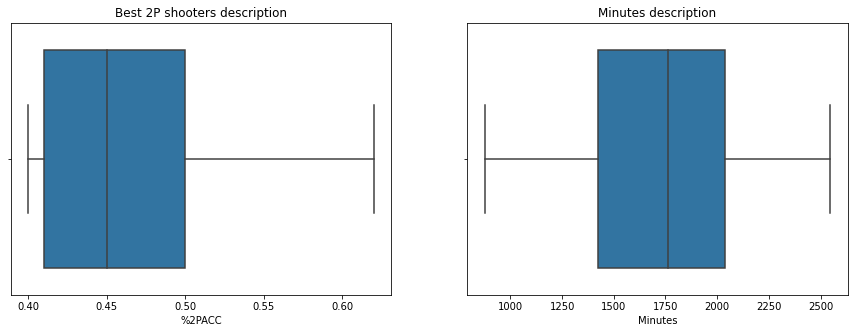

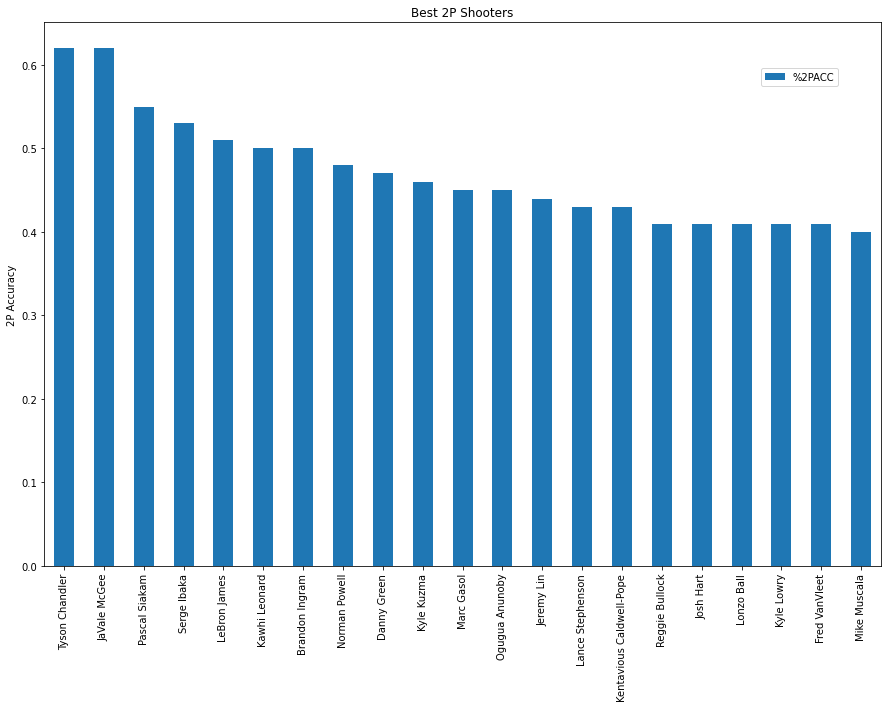

In [129]:
best_2p_shooters=nba2019[["Player","%2PACC","Team","MIN"]]
best_2p_shooters1=best_2p_shooters.sort_values(by="%2PACC", ascending=False)
display(best_2p_shooters1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
box_2PACC=sns.boxplot([nba2019["%2PACC"]])
plt.title("Best 2P shooters description")
plt.xlabel("%2PACC")
plt.subplot(1,2,2)
box_mins=sns.boxplot([nba2019["MIN"]])
plt.title("Minutes description")
plt.xlabel("Minutes")
plt.figure()
ax=best_2p_shooters1["%2PACC"].plot(kind='bar', figsize=(15,10))
ax.set_xticklabels(best_2p_shooters1.Player, rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(0.85, 0.9))
plt.title("Best 2P Shooters")
plt.ylabel("2P Accuracy")

,Player,%3PACC,Team,MIN
36,Danny Green,0.46,Toronto Raptors,2215.5
39,Norman Powell,0.40,Toronto Raptors,1126.4
38,Fred VanVleet,0.38,Toronto Raptors,1760.2
16,Reggie Bullock,0.38,Lakers,1878.9
18,Lance Stephenson,0.37,Lakers,1122.7
31,Kawhi Leonard,0.37,Toronto Raptors,2040.2
32,Pascal Siakam,0.37,Toronto Raptors,2547.7
34,Marc Gasol,0.36,Toronto Raptors,2436.1
14,Kentavious Caldwell-Pope,0.35,Lakers,2035.0
20,Mike Muscala,0.35,Lakers,1305.9


Text(0, 0.5, '3P Accuracy')

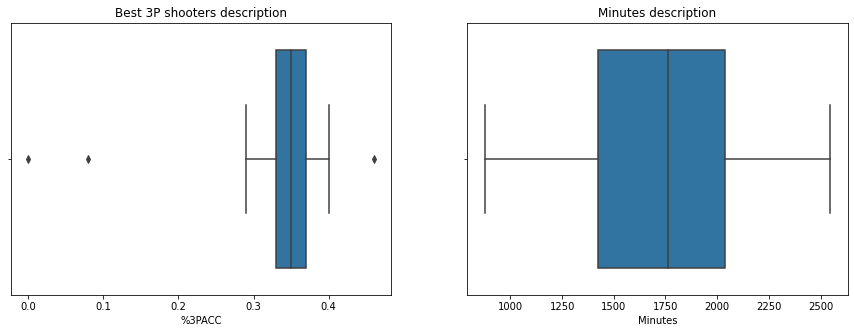

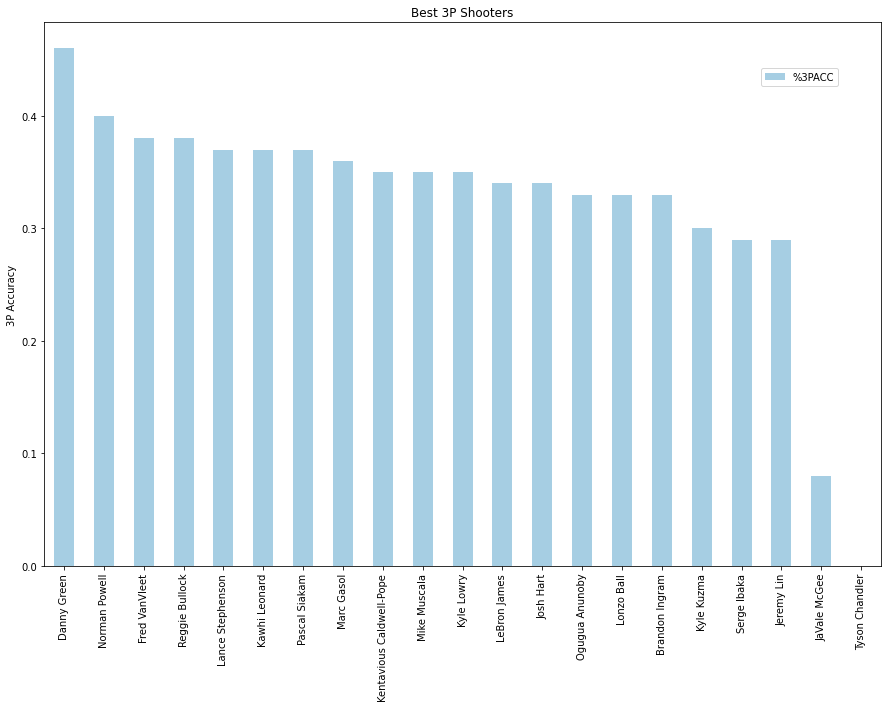

In [132]:
best_3p_shooters=nba2019[["Player","%3PACC","Team","MIN"]]
best_3p_shooters1=best_3p_shooters.sort_values(by="%3PACC", ascending=False)
display(best_3p_shooters1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
box_3PACC=sns.boxplot([nba2019["%3PACC"]])
plt.title("Best 3P shooters description")
plt.xlabel("%3PACC")
plt.subplot(1,2,2)
box_mins=sns.boxplot([nba2019["MIN"]])
plt.title("Minutes description")
plt.xlabel("Minutes")
plt.figure()
ax=best_3p_shooters1["%3PACC"].plot(kind='bar',colormap="Paired", figsize=(15,10))
ax.set_xticklabels(best_3p_shooters1.Player, rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(0.85, 0.9))
plt.title("Best 3P Shooters")
plt.ylabel("3P Accuracy")